### Read the files

In [51]:
import pandas as pd

articles = pd.read_csv('articleInfo.csv')
authors = pd.read_csv('authorInfo.csv')

### Merge the data frames into 1 and fill empty cells with 0

In [52]:
mergedDF = pd.merge(articles, authors, on='Article No.')
mergedDF['Country'] = mergedDF['Country'].replace('USA', 'United States of America')
mergedDF['Country'] = mergedDF['Country'].replace('Korea', 'South Korea')
mergedDF['Country'] = mergedDF['Country'].replace('Chian', 'China')
mergedDF['Country'] = mergedDF['Country'].replace('Denamrk', 'Denmark')
mergedDF['Country'] = mergedDF['Country'].replace('Denmark ', 'Denmark')
mergedDF['Country'] = mergedDF['Country'].replace('Israel ', 'Israel')
mergedDF['Country'] = mergedDF['Country'].replace('Chile ', 'Chile')
mergedDF['Country'] = mergedDF['Country'].replace('Spain ', 'Spain')
mergedDF.fillna(0)

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,South Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,South Korea,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,81,Teaching Enzyme Catalysis Using Interactive Mo...,2019,7.0,"Graduate Education/Research, Biochemistry, Com...",85.0,JOURNAL OF CHEMICAL EDUCATION,The reemergence of virtual reality (VR) in the...,Journal,Kenny Miller,Boise State University,United States of America,0.0
384,81,Teaching Enzyme Catalysis Using Interactive Mo...,2019,7.0,"Graduate Education/Research, Biochemistry, Com...",85.0,JOURNAL OF CHEMICAL EDUCATION,The reemergence of virtual reality (VR) in the...,Journal,Shalini Ramachandran,Chapman University,United States of America,2.0
385,81,Teaching Enzyme Catalysis Using Interactive Mo...,2019,7.0,"Graduate Education/Research, Biochemistry, Com...",85.0,JOURNAL OF CHEMICAL EDUCATION,The reemergence of virtual reality (VR) in the...,Journal,Sheree Fu,California State University Los Angeles,United States of America,0.0
386,81,Teaching Enzyme Catalysis Using Interactive Mo...,2019,7.0,"Graduate Education/Research, Biochemistry, Com...",85.0,JOURNAL OF CHEMICAL EDUCATION,The reemergence of virtual reality (VR) in the...,Journal,Karen Howell,University of Southern California,United States of America,0.0


### Publications per year chart

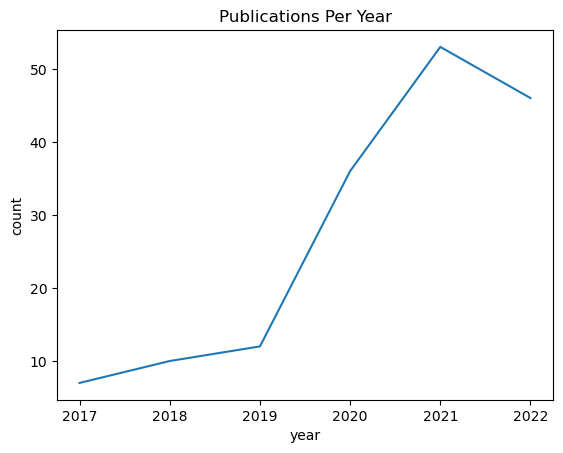

In [53]:
import matplotlib.pyplot as plt

yearTitle = articles[['Year', 'Title']]
years = yearTitle['Year'].sort_values().unique()
counts = yearTitle.groupby('Year').count()['Title'].to_numpy()

plt.plot(years, counts)
plt.title("Publications Per Year")
plt.xlabel("year")
plt.ylabel("count")
plt.show()

### Citations per year chart

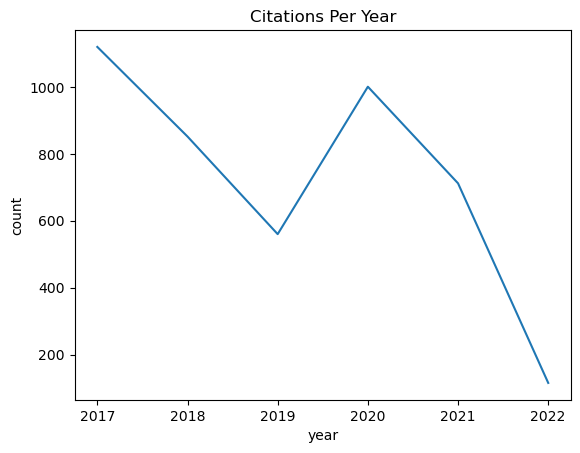

In [54]:
yearTitle = articles[['Year', 'Citation']]
years = yearTitle['Year'].sort_values().unique()
counts = yearTitle.groupby('Year').sum()['Citation'].to_numpy()

plt.plot(years, counts)
plt.title("Citations Per Year")
plt.xlabel("year")
plt.ylabel("count")
plt.show()

### Publications across countries

<AxesSubplot: >

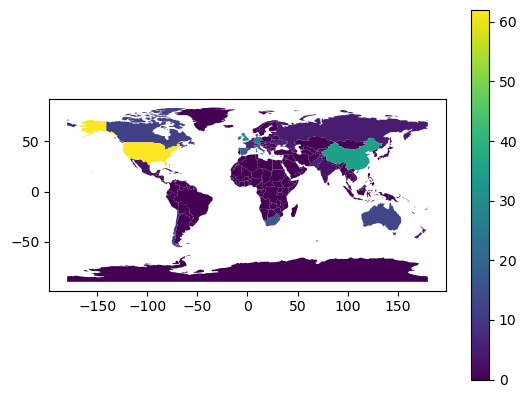

In [55]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]

# print(world.merge(mergedDF['Country'], how='right', left_on='name', right_on='Country').groupby('name').fillna(0))
# print(mergedDF['Country'].unique())

counts = mergedDF[['Country', 'Title']].groupby('Country').count()

counts

world = world.merge(counts, how='left', left_on='name', right_on='Country')

world = world.fillna(0)

fig, ax = plt.subplots(1, 1)

world.plot(column='Title', ax=ax, legend=True)

### Top 5 Institutions

In [56]:
counts = mergedDF[['Author Affiliation', 'Title']].groupby('Author Affiliation').count()

counts = counts.sort_values(by='Title', ascending=False)

print(counts.head(5))

                                     Title
Author Affiliation                        
University of the Western Cape          17
Masaryk University                      12
University College Cork                 11
Intel Corporation                       11
The Chinese University of Hong Kong      8


### Top 5 Researchers

In [57]:
names = authors[['Author Name', 'h-index']].sort_values(by='h-index', ascending=False)

print(names.head(5))

             Author Name  h-index
117     Ulrich Trautwein     95.0
102     Nicolas Molinari     63.0
130     George S. Athwal     59.0
140  Maria Luisa Lorusso     33.0
147  Vicente A. González     33.0
